In [258]:
import numpy as np
import random as rd
"""
kmeans算法过程  周志华——机器学习

  输入：训练数据集 $ D ={x{(1)},x{(2)},...,x^{(m)}},聚类簇数k  ;
  过程：函数 kMeans(D,k,maxIter) .
  1：从 D 中随机选择 k 个样本作为初始“簇中心”向量： $ {\mu{(1)},\mu{(2)},...,,\mu^{(k)}} $ :
  2：repeat
  3：  令 Ci=∅(1≤i≤k)
  4：  for j=1,2,...,m do
  5：    计算样本 x(j) 与各“簇中心”向量 μ(i)(1≤i≤k) 的欧式距离
  6：    根据距离最近的“簇中心”向量确定 x(j) 的簇标记： λj=argmini∈{1,2,...,k}dji
  7：    将样本 x(j) 划入相应的簇： Cλj=Cλj⋃{x(j)} ;
  8：  end for
  9：  for i=1,2,...,k do
  10：    计算新“簇中心”向量： (μ(i))′=1|Ci|∑x∈Cix ;
  11：    if (μ(i))′!=μ(i) then
  12：      将当前“簇中心”向量 μ(i) 更新为 (μ(i))′
  13：    else
  14：      保持当前均值向量不变
  15：    end if
  16：  end for
  17：  else
  18：until 当前“簇中心”向量均未更新
  输出：簇划分 C=C1,C2,...,CK"""

class KMeans:
    def __init__(self, k = 3, max_iter = 1000):
        self.k = k
        self.max_iter = max_iter
        self.final_center = None
    
    
    def fit(self, X_train):
#       从D 中随机选择k 个样本作为初始均值向量{μ1 ，μ2，...，μk}
        n_sample, n_feature = X_train.shape
        # 每个簇的中心
        self.center = np.zeros((self.k, n_feature))
        #保存聚类结果
        self.cluster = [[] for _ in range(self.k)]
        # 随机选取k个index对应的样本作为中心点
        sample_data_index = rd.sample(list(range(0,X.shape[0])),self.k)
        # 生成k个中心点
        self.center = X_train[sample_data_index]
        
        for _ in range(self.max_iter):
            for i in range(n_sample):
                # 样本i距离其它样本的最小距离
                min_dist = np.inf   # np.inf  无穷大  （因为要求与中心点距离最小的样本）
                # 最小距离所对应的中心点
                min_center = 0
                for j in range(self.k):
                    # 第i个样本与第j个中心的距离
                    dist= np.sqrt(np.sum(np.square(X_train[i]-self.center[j])))
                    #dist = math.sqrt(math.pow(X_train[i][0]-self.center[j][0],2)+math.pow(X_train[i][1]-self.center[j][1],2))
                    if dist < min_dist:
                        min_dist = dist
                        min_center = j
                # 将第i个样本划分到距离最近的簇
                self.cluster[min_center].append(i)
                
            # 更新聚类中心    
            prev_center = self.center
            for j in range(self.k):
                # 该类所有样本索引
                idx = self.cluster[j]
                # 计算新的簇中心（求当前簇所有样本的均值）
                self.center[j] = np.mean(X_train[idx], axis=0)
            center_diff = self.center - prev_center
            # 如果聚类中心不再移动则聚类结束
            if np.all(center_diff == 0):
                self.final_center = self.center
                break
    def predict(self, X_test):
        # 根据fit里的聚类结果 self.cluster  给每个样本一个聚类中心
        y_pred = np.zeros(X_test.shape[0])
        for i in range(self.k):
            # 遍历该簇样本 （样本的index）
            for j in self.cluster[i]:
                y_pred[j] = i
        return y_pred
        


In [259]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

In [260]:
X.shape

(150, 2)

In [271]:
# 因为初始中心点为随机生成所以聚类结果每次都有差别
clf = KMeans(k = 3, max_iter = 1000)
clf.fit(X)
y_pred = clf.predict(X)

<Figure size 1600x640 with 0 Axes>

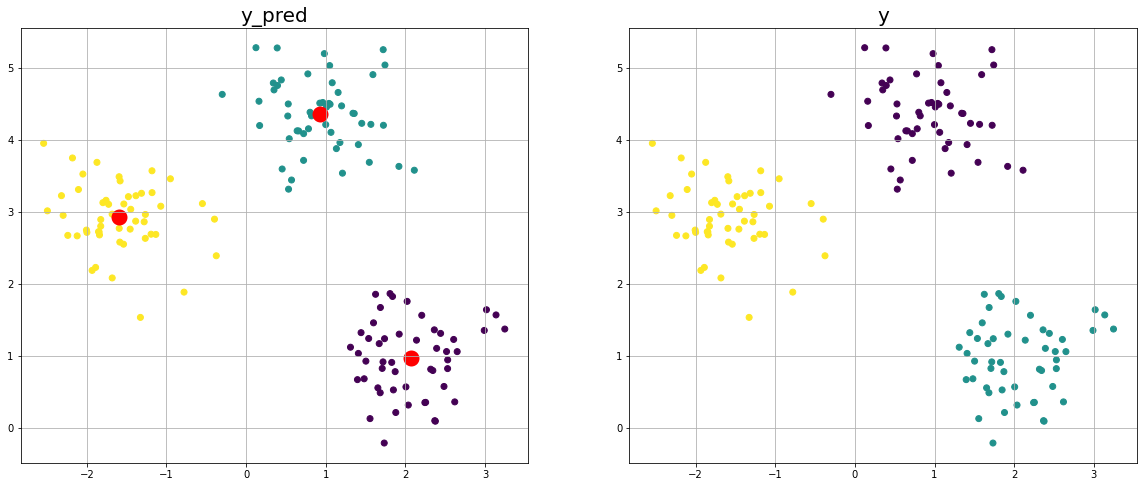

In [272]:
# 画图    自己实现的KMeans划分的类与正确结果对比
plt.figure(figsize = (20, 8) ,dpi = 80)
f, ax = plt.subplots(1, 2, figsize = (20, 8), )
ax[0].scatter(X[: , 0], X[:, 1], c = y_pred)
ax[0].scatter(clf.final_center[:, 0], clf.final_center[:, 1], marker = 'o', c = 'r', linewidth = 10)
ax[0].grid()
ax[0].set_title("y_pred", fontsize = 20 )
ax[1].scatter(X[: , 0], X[:, 1], c = y )
ax[1].set_title("y", fontsize = 20)
ax[1].grid()

plt.show()

<Figure size 1600x640 with 0 Axes>

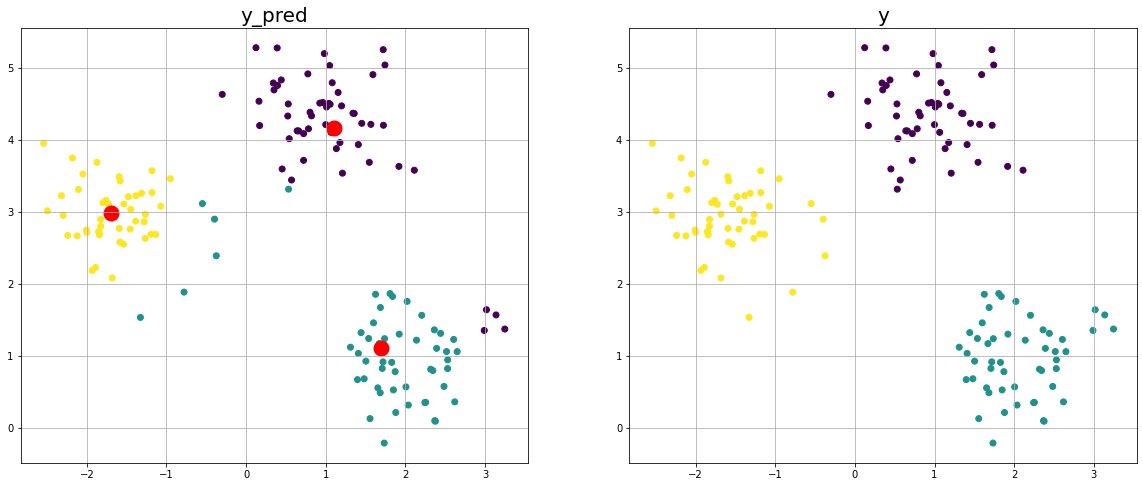

In [298]:
# 因为初始中心点为随机生成所以聚类结果每次都有差别
clf = KMeans(k = 3, max_iter = 100000)
clf.fit(X)
y_pred = clf.predict(X)
# 画图    自己实现的KMeans划分的类与正确结果对比
plt.figure(figsize = (20, 8) ,dpi = 80)
f, ax = plt.subplots(1, 2, figsize = (20, 8), )
ax[0].scatter(X[: , 0], X[:, 1], c = y_pred)
ax[0].scatter(clf.final_center[:, 0], clf.final_center[:, 1], marker = 'o', c = 'r', linewidth = 10)
ax[0].grid()
ax[0].set_title("y_pred", fontsize = 20 )
ax[1].scatter(X[: , 0], X[:, 1], c = y )
ax[1].set_title("y", fontsize = 20)
ax[1].grid()

plt.show()